## Char detection MLP

In [106]:
import cv2
import os
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import np_utils

%matplotlib inline

# read dataset

In [73]:
alphabet = [f for f in listdir('./Dataset/')]
print(alphabet)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [74]:
feature = []
target = []
for f in alphabet:    
    files =  [f for f in listdir('./Dataset/'+f) ]
    for path in files:
        img = cv2.imread(f'./Dataset/{f}/{path}', cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (34,34))
        img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]            
        #plt.imshow(img,cmap='gray')        
        #plt.show()        
        img[img==255] = 1 # convert 255 to 1
        img = np.asarray(img).reshape(-1) # convert image from matrix to vector        
        feature.append(img)
        target.append(f)            

<Figure size 1440x1440 with 0 Axes>

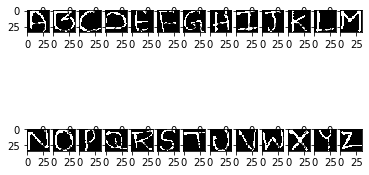

In [159]:
plt.figure(figsize=(20, 20))
fig, axs = plt.subplots(2,13)
for f in alphabet:    
    files =  [f for f in listdir('./Dataset/'+f) ]
    for path in files:
        i = int(alphabet.index(f) > 12)
        j = alphabet.index(f) % 13        
        img = cv2.imread(f'./Dataset/{f}/{path}', cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (34,34))
        img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]            
        axs[i,j].imshow(img,cmap='gray')                
        break
plt.show()   

In [75]:
feature = pd.DataFrame(feature)
feature.head()

,0,1,2,3,4,5,6,7,8,9,...,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155
0,0,0,0,0,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
target = pd.DataFrame(target)
target.columns = ['target']
target.head(5)

,target
0,A
1,A
2,A
3,A
4,A


In [77]:
print(f'feature shape : {feature.shape}')
print(f'target shape : {target.shape}')

feature shape : (6831, 1156)
target shape : (6831, 1)


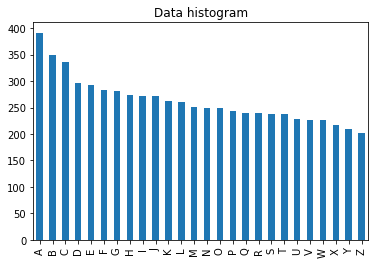

In [78]:
target = target['target']
ax = target.value_counts().plot(kind='bar',title='Data histogram')
ax.set_xticks(range(0,26))
ax.set_xticklabels(alphabet)
plt.show()

# one hot encoding

In [79]:
# first convert from char to index
target = target.apply(lambda x : alphabet.index(x))
target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [80]:
target = np_utils.to_categorical(target, 26)
target[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# train test split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(feature,target,shuffle=True)

# build MLP network

In [96]:
model = Sequential()
model.add(Dense(512,activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(26, activation='softmax'))

# Complie model

In [97]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam', metrics=['acc'])

# Train our model

In [98]:
model.fit(X_train,y_train,batch_size =32, epochs=50)

Epoch 1/50
161/161 [==============================] - 2s 11ms/step - loss: 1.3658 - acc: 0.6119
Epoch 2/50
161/161 [==============================] - 2s 10ms/step - loss: 0.4525 - acc: 0.8680
Epoch 3/50
161/161 [==============================] - 2s 11ms/step - loss: 0.2238 - acc: 0.9368
Epoch 4/50
161/161 [==============================] - 2s 11ms/step - loss: 0.1208 - acc: 0.9631
Epoch 5/50
161/161 [==============================] - 2s 12ms/step - loss: 0.1608 - acc: 0.9574
Epoch 6/50
161/161 [==============================] - 2s 12ms/step - loss: 0.0849 - acc: 0.9756
Epoch 7/50
161/161 [==============================] - 2s 13ms/step - loss: 0.0463 - acc: 0.9871: 0s - loss: 0.0491 - acc:
Epoch 8/50
161/161 [==============================] - 2s 12ms/step - loss: 0.0258 - acc: 0.9932
Epoch 9/50
161/161 [==============================] - 2s 13ms/step - loss: 0.0631 - acc: 0.9807: 0s - loss: 0.0442 - acc: 0.98 - ETA: 0s - loss: 0.0463 -
Epoch 10/50
161/161 [==============================]

# Evaluation

## in train data set

In [99]:
model.evaluate(X_train,y_train)

161/161 [==============================] - 1s 6ms/step - loss: 9.0417e-06 - acc: 1.0000


[9.041653356689494e-06, 1.0]

In [100]:
model.evaluate(X_test,y_test)

54/54 [==============================] - 0s 6ms/step - loss: 0.7494 - acc: 0.9069


[0.7493942379951477, 0.9069086909294128]

# confusion matrix

In [124]:
def confusion_matrix(validations, predictions):        
    matrix = metrics.confusion_matrix(validations, predictions)                
    matrix =  np.divide(matrix.transpose(),np.sum(matrix, axis=1)).transpose() * 100    
    plt.figure(figsize=(20, 20))
    sns.heatmap(matrix,cmap="Reds",linecolor='white',linewidths=1,
                xticklabels=alphabet,yticklabels=alphabet,annot=True,fmt=".1f")    
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

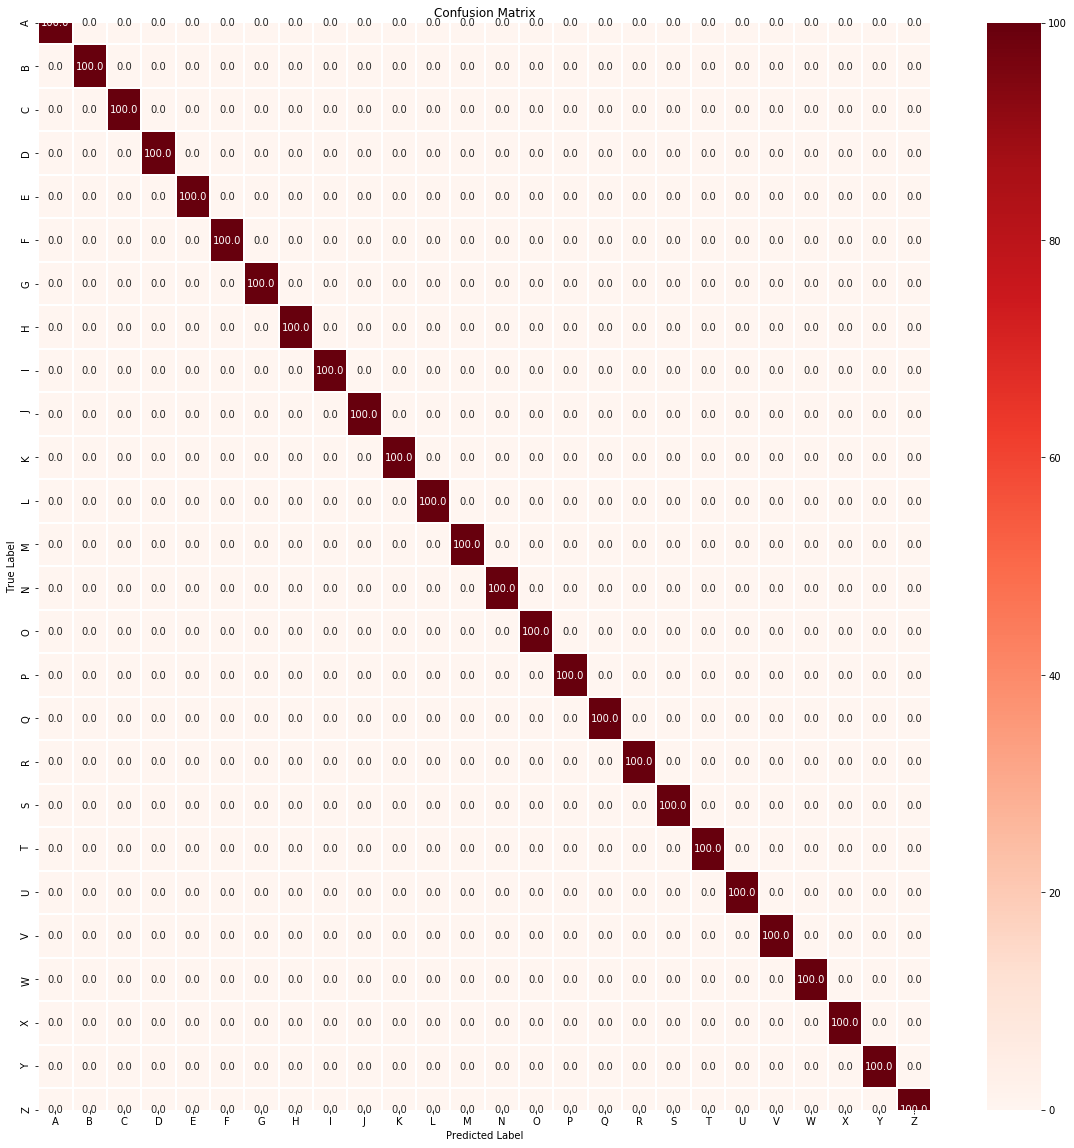

In [125]:
matrix = confusion_matrix(np.argmax(y_train, axis=1), np.argmax(model.predict(X_train), axis=1))

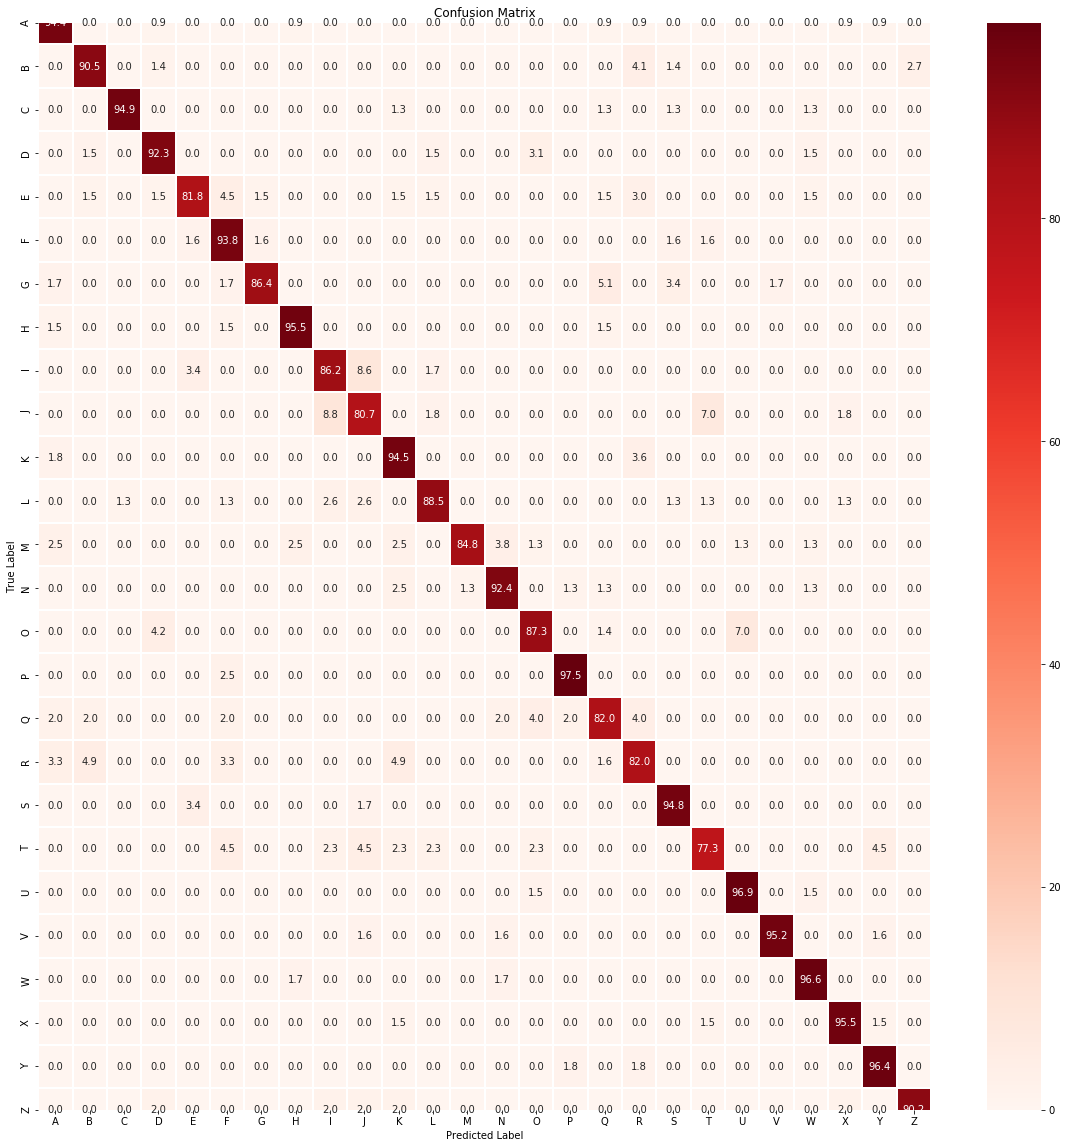

In [127]:
matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))